## Module 2: Image Segmentation and Edge Detection (Handled by Student 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
from skimage import io, color, img_as_float, img_as_ubyte, exposure, filters
from scipy.ndimage import convolve

### 1.Edge Detection:

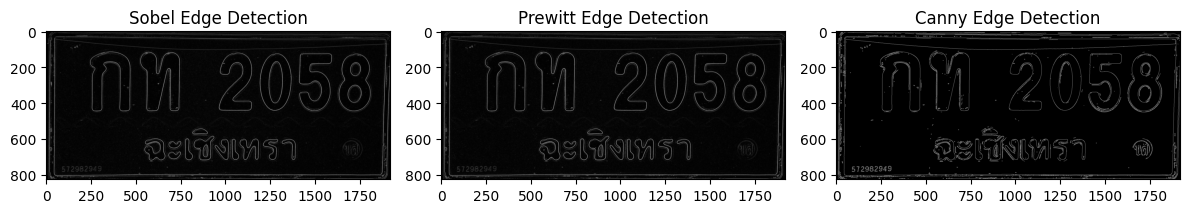

In [2]:
# Load the image
image = cv2.imread('License_plate_003.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert from RGB to grayscale
gray_image = color.rgb2gray(img_rgb)

# Convert the grayscale image to 8-bit for Canny
gray_image_8bit = (gray_image * 255).astype(np.uint8)

# Apply Sobel, Prewitt, and Canny edge detection
sobel_edges = filters.sobel(gray_image)
prewitt_edges = filters.prewitt(gray_image)
canny_edges = cv2.Canny(gray_image_8bit, 100, 200)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()


### 2.Image Segmentation:

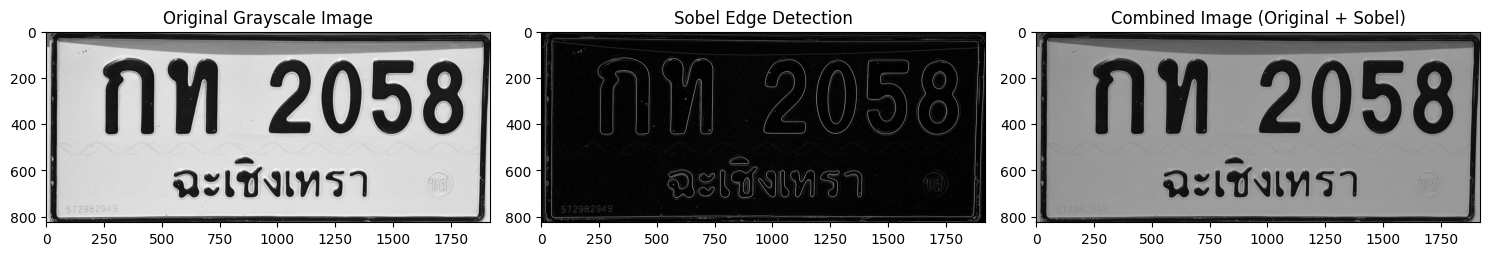

In [3]:
# Apply Sobel edge detection
sobel_edges = filters.sobel(gray_image)

# Normalize the Sobel edges to [0, 255] for proper display
sobel_edges_normalized = (sobel_edges * 255).astype(np.uint8)

# Combine the original grayscale image with the Sobel edge detection result
combined_sobel_image = cv2.addWeighted(cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR), 0.7, 
                                       cv2.cvtColor(sobel_edges_normalized, cv2.COLOR_GRAY2BGR), 0.3, 0)

# Display the original grayscale image, Sobel edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image_8bit, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Sobel)")
plt.imshow(cv2.cvtColor(combined_sobel_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


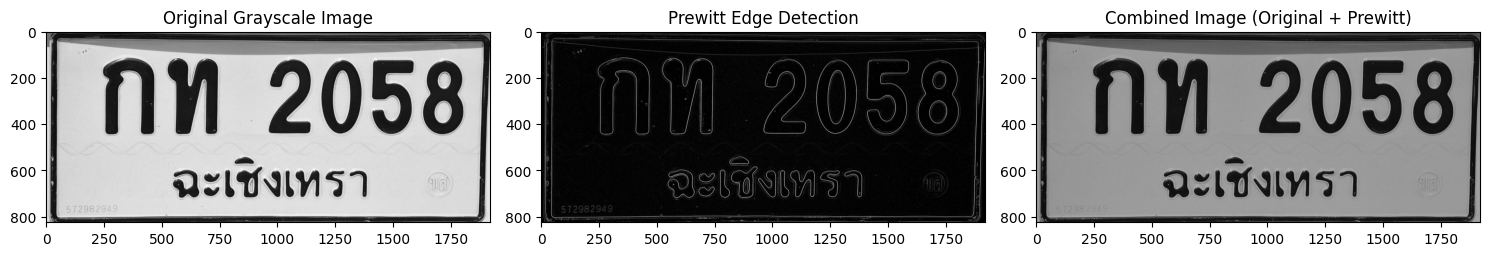

In [5]:
# Apply Prewitt edge detection
prewitt_edges = filters.prewitt(gray_image)

# Normalize the edges to [0, 255] for proper display
prewitt_edges_normalized = (prewitt_edges * 255).astype(np.uint8)

# Combine the original grayscale image with the Prewitt edge detection result
combined_image = cv2.addWeighted(cv2.cvtColor(gray_image_8bit, cv2.COLOR_GRAY2BGR), 0.7, 
                                 cv2.cvtColor(prewitt_edges_normalized, cv2.COLOR_GRAY2BGR), 0.3, 0)

# Display the original grayscale image, Prewitt edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image_8bit, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Prewitt Edge Detection")
plt.imshow(prewitt_edges_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Prewitt)")
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


In [ ]:


# Apply Canny edge detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Combine the original grayscale image with the Canny edge detection result
canny_edges_bgr = cv2.cvtColor(canny_edges, cv2.COLOR_GRAY2BGR)
combined_canny_image = cv2.addWeighted(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), 0.7, canny_edges_bgr, 0.3, 0)

# Display the original grayscale image, Canny edge detection, and combined result
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Image (Original + Canny)")
plt.imshow(cv2.cvtColor(combined_canny_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


### 3.Morphological Operations:

In [ ]:

# Function to check if image is loaded correctly
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Cannot load image from {image_path}")
    return image

# Load the image
image_path = '9999.jpg'  # Replace with your image path
image = load_image(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation, erosion, opening, and closing
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)
eroded_image = cv2.erode(gray_image, kernel, iterations=1)
opening_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
closing_image = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Opening Image")
plt.imshow(opening_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Closing Image")
plt.imshow(closing_image, cmap='gray')

plt.tight_layout()
plt.show()


### 3.1 Original Grayscale Image

In [ ]:

# Convert the grayscale image to 3 channels so it can be merged with the original
grayscale_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Convert the original grayscale image (gray_image) to 3 channels
gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Combine the two 3-channel images side by side
combined_image = np.hstack((gray_image_3ch, grayscale_3ch))

# Display the combined result
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Original Grayscale Image Combined")
plt.axis('off')
plt.show()


### 3.2 Dilated Image

In [ ]:

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)

# Convert the original image to grayscale (3-channel version)
original_gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original_gray_image_3ch = cv2.cvtColor(original_gray_image, cv2.COLOR_GRAY2BGR)

# Convert dilated image to 3 channels to match the original grayscale image
dilated_image_3ch = cv2.cvtColor(dilated_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the dilated image side by side
combined_image_gray_dilated = np.hstack((original_gray_image_3ch, dilated_image_3ch))

# Display the grayscale original and dilated image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_dilated, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Dilated Image Combined")
plt.axis('off')
plt.show()


### 3.3 Eroded Image

In [ ]:

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform erosion
eroded_image = cv2.erode(gray_image, kernel, iterations=1)

# Convert the original image to grayscale (3-channel version)
original_gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original_gray_image_3ch = cv2.cvtColor(original_gray_image, cv2.COLOR_GRAY2BGR)

# Convert eroded image to 3 channels to match the original grayscale image
eroded_image_3ch = cv2.cvtColor(eroded_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the eroded image side by side
combined_image_gray_eroded = np.hstack((original_gray_image_3ch, eroded_image_3ch))

# Display the grayscale original and eroded image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_eroded, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Eroded Image ")
plt.axis('off')
plt.show()


### 3.4 Opening Image

In [ ]:

# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform opening operation (erosion followed by dilation)
opening_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

# Convert the original image to grayscale (3-channel version)
original_gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original_gray_image_3ch = cv2.cvtColor(original_gray_image, cv2.COLOR_GRAY2BGR)

# Convert opening image to 3 channels to match the grayscale original image
opening_image_3ch = cv2.cvtColor(opening_image, cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the opening image side by side
combined_image_gray_opening = np.hstack((original_gray_image_3ch, opening_image_3ch))

# Display the grayscale original and opening image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_image_gray_opening, cv2.COLOR_BGR2RGB))
plt.title("Original Image and Opening Image Combined")
plt.axis('off')
plt.show()


### 3.5 Closing Image

In [ ]:


# Define the kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Perform closing operation on the grayscale image
closing_image = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

# Convert the closing image to 3 channels to match the original
closing_image_3ch = cv2.cvtColor(closing_image, cv2.COLOR_GRAY2BGR)

# Convert the original image to grayscale (3-channel version)
original_gray_image_3ch = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)

# Combine the grayscale original image with the closing image side by side
combined_gray_closing = np.hstack((original_gray_image_3ch, closing_image_3ch))

# Display the grayscale original and closing image side by side
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(combined_gray_closing, cv2.COLOR_BGR2RGB))
plt.title("Grayscale Original Image and Closing Image Combined")
plt.axis('off')
plt.show()
